In [40]:
import pandas as pd
# from matplotlib.cm import binary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.datasets import fetch_openml
# from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,precision_recall_curve
# from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit,cross_val_predict
# from sklearn.metrics import accuracy_score,mean_squared_error
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from pandas.plotting import scatter_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
names = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df = pd.read_csv("Titanic.csv",names=names)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21172   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.shape)
df.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df1 = df.drop("Cabin",axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


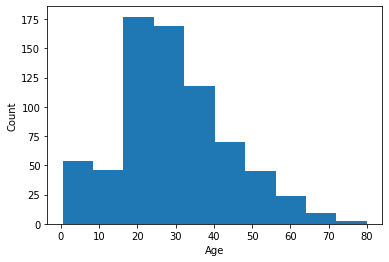

In [7]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [8]:
x = df1['Age'].median()
df1 = df1.fillna(x)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21172,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
df1 = df1.dropna(subset=['Embarked'])

In [10]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

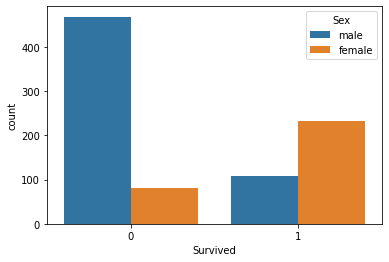

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

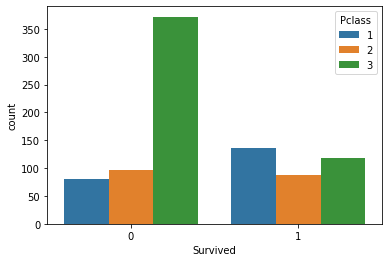

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=df1)

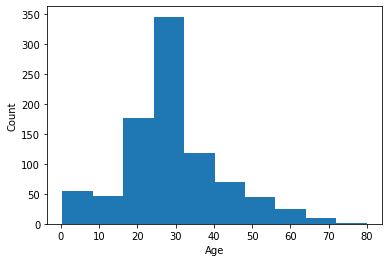

In [13]:
plt.hist(df1['Age'])
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

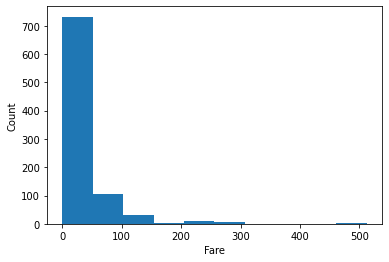

In [14]:
plt.hist(df1["Fare"])
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [15]:
for i in range(len(df1['Sex'])):
    if(df1['Sex'][i]=="male"):
        df1['Sex'][i]=1
    else:
        df1['Sex'][i]=0
df1

C:\Users\DELL\AppData\Local\Temp\ipykernel_17556\99698209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'][i]=1
C:\Users\DELL\AppData\Local\Temp\ipykernel_17556\99698209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'][i]=0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21172,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [16]:
df1['Embarked'].value_counts()

S       644
C       168
Q        77
28.0      2
Name: Embarked, dtype: int64

In [17]:
for i in range(len(df1['Embarked'])):
    if(df1['Embarked'][i]=='S'):
        df1['Embarked'][i]=0
    elif(df1['Embarked'][i]=='C'):
        df1['Embarked'][i]=1
    elif(df1['Embarked'][i]=='Q'):
        df1['Embarked'][i]=2
df1 = df1[df1['Embarked']!=28.0]
df1

C:\Users\DELL\AppData\Local\Temp\ipykernel_17556\3374811112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Embarked'][i]=0
C:\Users\DELL\AppData\Local\Temp\ipykernel_17556\3374811112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Embarked'][i]=1
C:\Users\DELL\AppData\Local\Temp\ipykernel_17556\3374811112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Embarked'][i]=2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21172,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1


In [18]:
df1['Embarked'].value_counts()

0    644
1    168
2     77
Name: Embarked, dtype: int64

In [19]:
df1 = df1.drop(['Name','Ticket'],axis=1)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,28.0,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,1


In [20]:
df1['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [28]:
data = df1.drop(['Survived','PassengerId'],axis=1)
labels = df1['Survived']

In [31]:
data_train,data_test,labels_train,labels_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [33]:
model = LogisticRegression()
model.fit(data_train,labels_train)

LogisticRegression()

In [36]:
prediction = model.predict(data_test)
confusion_matrix(labels_test,prediction)

array([[87, 22],
       [16, 53]], dtype=int64)

In [37]:
classification_report(labels_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.84      0.80      0.82       109\n           1       0.71      0.77      0.74        69\n\n    accuracy                           0.79       178\n   macro avg       0.78      0.78      0.78       178\nweighted avg       0.79      0.79      0.79       178\n'

In [38]:
f1_score(labels_test,prediction)

0.736111111111111

In [41]:
model1 = KNeighborsClassifier(n_neighbors=50,weights='distance',algorithm='auto')
model1.fit(data_train,labels_train)
pred_model1 = model1.predict(data_test)
classification_report(labels_test,pred_model1)

'              precision    recall  f1-score   support\n\n           0       0.73      0.83      0.78       109\n           1       0.66      0.51      0.57        69\n\n    accuracy                           0.71       178\n   macro avg       0.69      0.67      0.68       178\nweighted avg       0.70      0.71      0.70       178\n'

In [42]:
model2 = KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='auto')
model2.fit(data_train,labels_train)
pred_model2 = model2.predict(data_test)
classification_report(labels_test,pred_model2)

'              precision    recall  f1-score   support\n\n           0       0.77      0.81      0.79       109\n           1       0.67      0.61      0.64        69\n\n    accuracy                           0.73       178\n   macro avg       0.72      0.71      0.71       178\nweighted avg       0.73      0.73      0.73       178\n'